In [70]:

import pandas as pd
import numpy as np
try :
  import geopandas as gpd
except:
  %pip install geopandas
  import geopandas as gpd
import matplotlib.pyplot as plt
try:
  import plotly.express as px
except: 
  %pip install plotly
  import plotly.express as px
try:
  import folium
  from folium.plugins import MarkerCluster
except: 
  %pip install folium
  import folium
  from folium.plugins import MarkerCluster
import datetime

In [2]:
df = pd.read_csv('/content/drive/Shareddrives/Datanators/Data/Wildland_Fire_Incident_Locations.csv')

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8,17,35,64,67,88,89,93,94) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'SourceOID', 'ABCDMisc', 'ADSPermissionState',
       'CalculatedAcres', 'ContainmentDateTime', 'ControlDateTime',
       'CreatedBySystem', 'IncidentSize', 'DiscoveryAcres', 'DispatchCenterID',
       'EstimatedCostToDate', 'FinalAcres', 'FinalFireReportApprovedByTitle',
       'FinalFireReportApprovedByUnit', 'FinalFireReportApprovedDate',
       'FireBehaviorGeneral', 'FireBehaviorGeneral1', 'FireBehaviorGeneral2',
       'FireBehaviorGeneral3', 'FireCause', 'FireCauseGeneral',
       'FireCauseSpecific', 'FireCode', 'FireDepartmentID',
       'FireDiscoveryDateTime', 'FireMgmtComplexity', 'FireOutDateTime',
       'FireStrategyConfinePercent', 'FireStrategyFullSuppPercent',
       'FireStrategyMonitorPercent', 'FireStrategyPointZonePercent',
       'FSJobCode', 'FSOverrideCode', 'GACC', 'ICS209ReportDateTime',
       'ICS209ReportForTimePeriodFrom', 'ICS209ReportForTimePeriodTo',
       'ICS209ReportStatus', 'IncidentManagementOrganization', 'IncidentNa

In [4]:
df = df[['X','Y','OBJECTID','DiscoveryAcres','FireCause','FireDiscoveryDateTime','GACC',
         'POOCounty','POOFips','POOState']]

<AxesSubplot:>

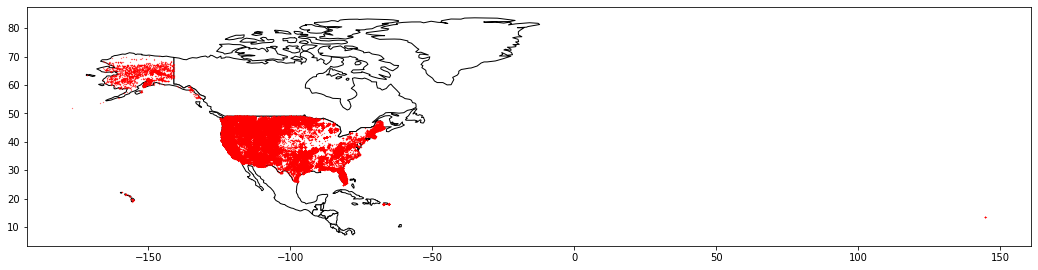

In [21]:
try:
  from shapely.geometry import Point
except:
  %pip install shapely
  from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black',figsize=(18, 12))
gdf.plot(ax = ax,marker='o', color='red', markersize=.05)

In [24]:
#Dataframes for different states
df.head()

,X,Y,OBJECTID,DiscoveryAcres,FireCause,FireDiscoveryDateTime,GACC,POOCounty,POOFips,POOState,geometry
0,-118.180712,33.808985,1,0.10,Unknown,2020/02/28 20:45:40+00,OSCC,Los Angeles,06037,US-CA,POINT (-118.18071 33.80898)
1,-117.153901,33.176394,2,NaN,NaN,2019/07/01 19:54:00+00,OSCC,San Diego,06073,US-CA,POINT (-117.15390 33.17639)
2,-121.104180,38.834727,3,NaN,NaN,2016/06/20 22:05:59+00,ONCC,Placer,06061,US-CA,POINT (-121.10418 38.83473)
3,-117.228592,33.782442,4,0.10,Undetermined,2021/11/25 15:17:32+00,OSCC,Riverside,06065,US-CA,POINT (-117.22859 33.78244)
4,-118.309032,33.941815,5,0.01,Undetermined,2022/11/21 11:25:33+00,OSCC,Los Angeles,06037,US-CA,POINT (-118.30903 33.94181)


In [37]:
df = df.sort_values(by = 'POOState')[36:]
df_states = []
for states in df.POOState.unique():
  df_states.append(df[df['POOState']==states])

In [42]:
df_states[1].head()

,X,Y,OBJECTID,DiscoveryAcres,FireCause,FireDiscoveryDateTime,GACC,POOCounty,POOFips,POOState,geometry
119038,-86.075505,33.147076,129040,1.0,Unknown,2021/04/19 12:20:54+00,SACC,Clay,1027.0,US-AL,POINT (-86.07550 33.14708)
191974,-87.397375,32.985776,221615,1.0,Unknown,2020/06/16 13:22:13+00,SACC,Bibb,1007.0,US-AL,POINT (-87.39738 32.98578)
79526,-86.510005,32.412228,79539,NaN,Undetermined,2022/02/14 18:46:59+00,SACC,Autauga,01001,US-AL,POINT (-86.51000 32.41223)
233981,-86.699245,31.057246,275140,1.0,Undetermined,2021/10/29 12:09:35+00,SACC,Covington,1039.0,US-AL,POINT (-86.69924 31.05725)
101217,-87.168695,32.856746,106294,80.0,Human,2019/03/23 13:53:00+00,SACC,Bibb,1007.0,US-AL,POINT (-87.16869 32.85675)


In [93]:
def indx_state(st):  
  inp_st = 'US-' + st
  st_list = df.POOState.unique()
  return np.where(st_list == inp_st)[0][0]
indx_state('TX')

44

In [94]:
st = input('Which state do you want to look at? (Use the two letter version)')
try:
  wfire = df_states[indx_state(st)]
except:
  print('Try again. Use two letter State representation')

Which state do you want to look at? (Use the two letter version)TX


In [96]:
USmap = folium.Map(location=[30.622370, -96.325851], zoom_start=10, control_scale=True)
feature_group = folium.FeatureGroup("Locations")
marker_cluster = MarkerCluster().add_to(USmap)
wfire['FireDiscoveryDateTime'] = pd.to_datetime(wfire['FireDiscoveryDateTime'])
wfire['FireYear'] = pd.DatetimeIndex(wfire.FireDiscoveryDateTime).year
wfire = wfire[wfire.FireYear>2015]
for i in range(wfire.shape[0]):
    lat = wfire.iloc[i].Y
    lng = wfire.iloc[i].X
    Year = wfire.iloc[i].FireYear
    Month = wfire.iloc[i].FireDiscoveryDateTime.month
    Day = wfire.iloc[i].FireDiscoveryDateTime.day
    Area = wfire.iloc[i].DiscoveryAcres
    Cause = wfire.iloc[i].FireCause
    pop = 'Date=%d/%d/%d \n\n\n Area=%.2f \n\n\n  Cause = %s'%(Month, Day, Year,  Area,  Cause)
    folium.Marker(location=[lat,lng],popup= pop, radius = 2, color = '#e25822',
                       icon = folium.Icon(icon='fire', color= '#e25822')).add_to(marker_cluster)


<ipython-input-96-006ab80ff641>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-96-006ab80ff641>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-96-006ab80ff641>:17: UserWarning:

color argument of Icon should be one of: {'pink', 'cadetblue', 'gray', 'black', 'beige', 'orange', 'lightred', 'red', 'green', 'purple', 'darkblue', 'blue', 'darkred', 'white', 'lightgray', 'darkgreen', 'lightgreen', 'lightblue', 'darkpurple'}.



In [99]:
#USmap

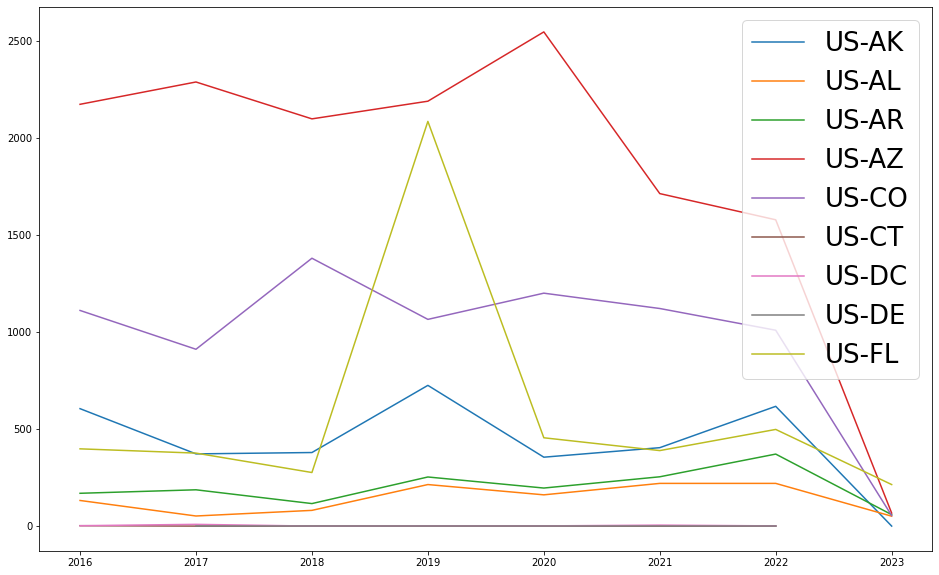

In [141]:
N = len(df_states)
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize = (16,10))
for i in range(int(N/5)):
  state = df_states[i]['POOState'].iloc[0]  
  if 'CA' in state:
    continue
  df_states[i]['FireDiscoveryDateTime'] = pd.to_datetime(df_states[i]['FireDiscoveryDateTime'])
  df_states[i]['FireYear'] = pd.DatetimeIndex(df_states[i].FireDiscoveryDateTime).year

  df_frequency = pd.DataFrame(df_states[i][df_states[i].FireYear>2015].FireYear.value_counts()).reset_index()
  df_frequency.columns = ['FireYear', 'Frequency']
  df_frequency.sort_values(by='FireYear', inplace=True)
  X = df_frequency.FireYear
  plt.plot(X,df_frequency.Frequency, label = state)
plt.legend(prop={'size': 26})

plt.show()

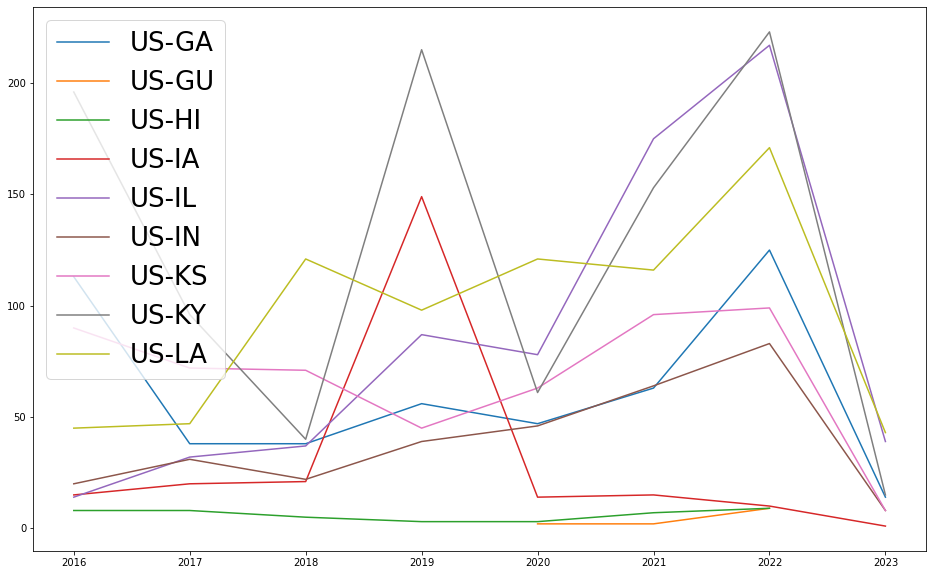

In [144]:

plt.figure(figsize = (16,10))
for i in range(int(N/5),2*int(N/5)):
  state = df_states[i]['POOState'].iloc[0]  
  if 'ID' in state:
    continue
  df_states[i]['FireDiscoveryDateTime'] = pd.to_datetime(df_states[i]['FireDiscoveryDateTime'])
  df_states[i]['FireYear'] = pd.DatetimeIndex(df_states[i].FireDiscoveryDateTime).year

  df_frequency = pd.DataFrame(df_states[i][df_states[i].FireYear>2015].FireYear.value_counts()).reset_index()
  df_frequency.columns = ['FireYear', 'Frequency']
  df_frequency.sort_values(by='FireYear', inplace=True)
  X = df_frequency.FireYear
  plt.plot(X,df_frequency.Frequency, label = state)
plt.legend(prop={'size': 26})

plt.show()

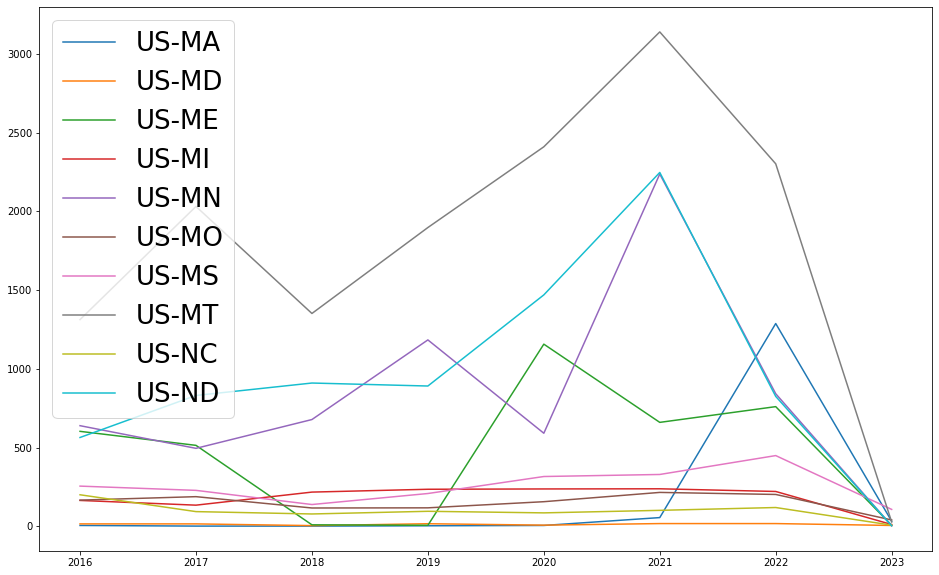

In [145]:

plt.figure(figsize = (16,10))
for i in range(2*int(N/5),3*int(N/5)):
  state = df_states[i]['POOState'].iloc[0]  
  if 'ID' in state:
    continue
  df_states[i]['FireDiscoveryDateTime'] = pd.to_datetime(df_states[i]['FireDiscoveryDateTime'])
  df_states[i]['FireYear'] = pd.DatetimeIndex(df_states[i].FireDiscoveryDateTime).year

  df_frequency = pd.DataFrame(df_states[i][df_states[i].FireYear>2015].FireYear.value_counts()).reset_index()
  df_frequency.columns = ['FireYear', 'Frequency']
  df_frequency.sort_values(by='FireYear', inplace=True)
  X = df_frequency.FireYear
  plt.plot(X,df_frequency.Frequency, label = state)
plt.legend(prop={'size': 26})

plt.show()

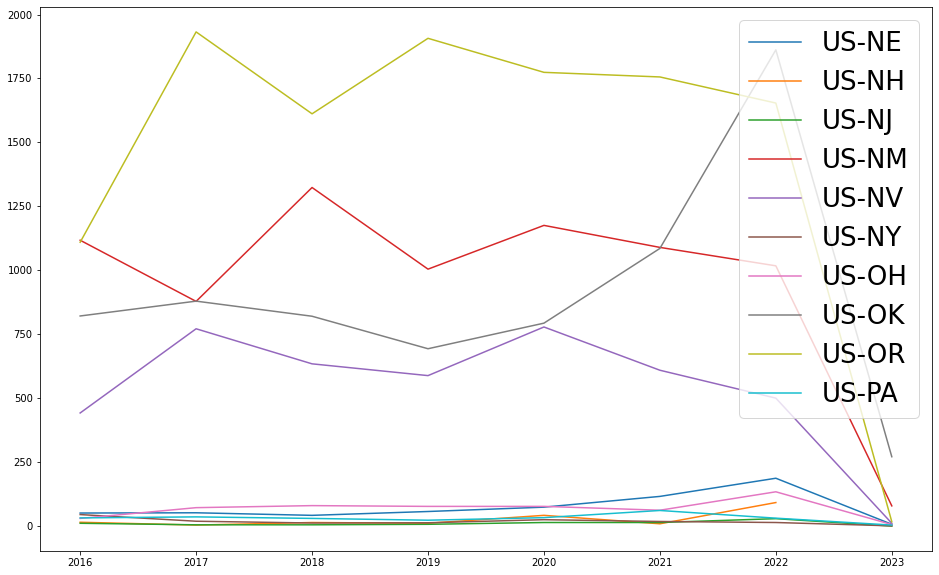

In [146]:

plt.figure(figsize = (16,10))
for i in range(3*int(N/5),4*int(N/5)):
  state = df_states[i]['POOState'].iloc[0]  
  if 'ID' in state:
    continue
  df_states[i]['FireDiscoveryDateTime'] = pd.to_datetime(df_states[i]['FireDiscoveryDateTime'])
  df_states[i]['FireYear'] = pd.DatetimeIndex(df_states[i].FireDiscoveryDateTime).year

  df_frequency = pd.DataFrame(df_states[i][df_states[i].FireYear>2015].FireYear.value_counts()).reset_index()
  df_frequency.columns = ['FireYear', 'Frequency']
  df_frequency.sort_values(by='FireYear', inplace=True)
  X = df_frequency.FireYear
  plt.plot(X,df_frequency.Frequency, label = state)
plt.legend(prop={'size': 26})

plt.show()

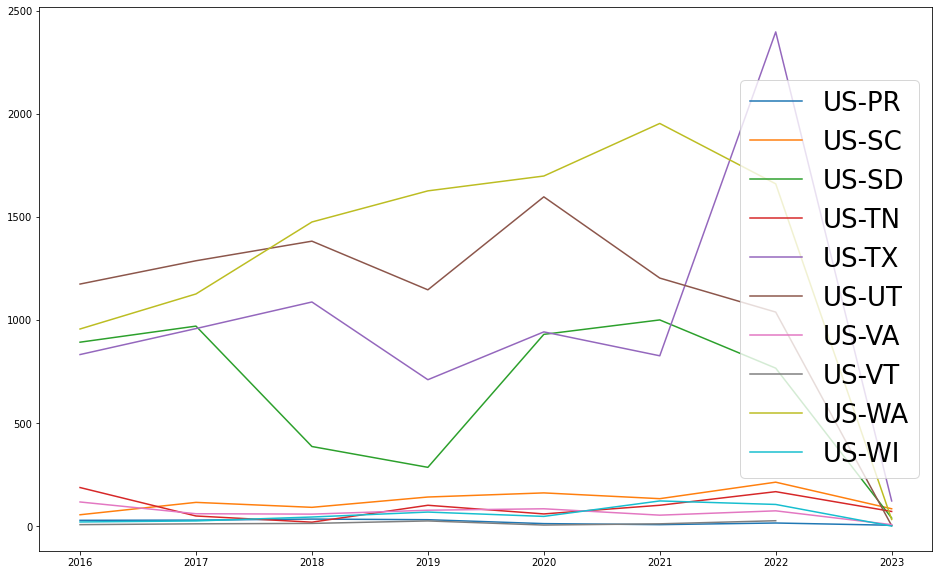

In [147]:

plt.figure(figsize = (16,10))
for i in range(4*int(N/5),5*int(N/5)):
  state = df_states[i]['POOState'].iloc[0]  
  if 'ID' in state:
    continue
  df_states[i]['FireDiscoveryDateTime'] = pd.to_datetime(df_states[i]['FireDiscoveryDateTime'])
  df_states[i]['FireYear'] = pd.DatetimeIndex(df_states[i].FireDiscoveryDateTime).year

  df_frequency = pd.DataFrame(df_states[i][df_states[i].FireYear>2015].FireYear.value_counts()).reset_index()
  df_frequency.columns = ['FireYear', 'Frequency']
  df_frequency.sort_values(by='FireYear', inplace=True)
  X = df_frequency.FireYear
  plt.plot(X,df_frequency.Frequency, label = state)
plt.legend(prop={'size': 26})

plt.show()

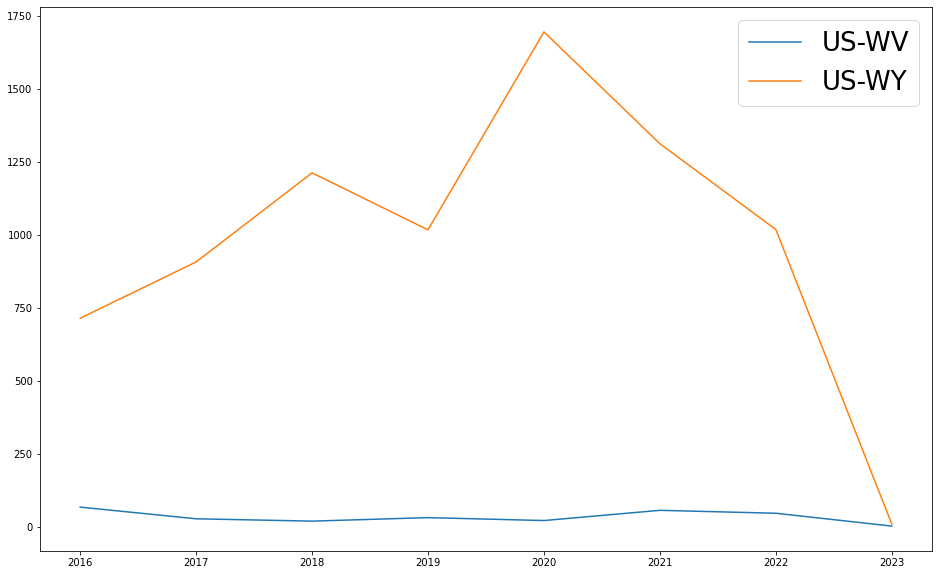

In [150]:

plt.figure(figsize = (16,10))
for i in range(5*int(N/5),N):
  state = df_states[i]['POOState'].iloc[0]  
  if 'ID' in state:
    continue
  df_states[i]['FireDiscoveryDateTime'] = pd.to_datetime(df_states[i]['FireDiscoveryDateTime'])
  df_states[i]['FireYear'] = pd.DatetimeIndex(df_states[i].FireDiscoveryDateTime).year

  df_frequency = pd.DataFrame(df_states[i][df_states[i].FireYear>2015].FireYear.value_counts()).reset_index()
  df_frequency.columns = ['FireYear', 'Frequency']
  df_frequency.sort_values(by='FireYear', inplace=True)
  X = df_frequency.FireYear
  plt.plot(X,df_frequency.Frequency, label = state)
plt.legend(prop={'size': 26})

plt.show()